In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import shapely
import geopandas as gpd
import warnings

warnings.filterwarnings('ignore')
folder = '/home/mickaelfigueredo/Workspace/data/'

In [3]:
alunos = pd.read_csv(folder+'alunos.csv')
alunos['serie'] = alunos['serie'].apply(lambda x: x.upper())
alunos = alunos.loc[alunos['etapa'].isin(alunos['etapa'].value_counts()[:5].index)]
alunos['etapa'] = alunos['etapa'].replace({'CEJA ENSINO MEDIO': 'EJA - ENSINO MÉDIO'})
alunos['serie'] = alunos['serie'].replace({'2º PERÍODO (2ª SÉRIE)':'2ª SÉRIE',
 '3º PERÍODO (3ª SÉRIE)':'3ª SÉRIE',
 '1º PERÍODO (1ª SÉRIE)':'1ª SÉRIE'                                 
})
alunos['geometry'] = alunos.apply(lambda x: shapely.geometry.Point([x['longitude'],x['latitude']]), axis=1)
alunos['media_final'] = alunos['media_final'].str.replace(',', '.', regex=False).astype(float)
alunos['frequencia'] = alunos['frequencia'].str.replace(',', '.', regex=False).astype(float)
alunos = gpd.GeoDataFrame(alunos)
alunos.head()

,ID,direc,municipio,escola,etapa,serie,turno,turma,disciplina,frequencia,media_final,situacao,latitude,longitude,geometry
0,9599,01ª DIREC - NATAL,NATAL,CE ALFERES TIRADENTES,ENSINO FUNDAMENTAL - ANOS FINAIS,6º ANO,MATUTINO,EFAFM6A,Língua Portuguesa,92.5,6.9,APROVADO,-5.885477,-35.168400,POINT (-35.16840029999999 -5.885477)
1,9595,01ª DIREC - NATAL,NATAL,CE ALFERES TIRADENTES,ENSINO FUNDAMENTAL - ANOS FINAIS,6º ANO,MATUTINO,EFAFM6A,Língua Portuguesa,100.0,6.6,APROVADO,-5.739230,-35.243496,POINT (-35.2434962 -5.739229900000001)
2,9606,01ª DIREC - NATAL,NATAL,CE ALFERES TIRADENTES,ENSINO FUNDAMENTAL - ANOS FINAIS,6º ANO,MATUTINO,EFAFM6A,Língua Portuguesa,100.0,6.1,APROVADO,-5.736580,-35.242956,POINT (-35.2429557 -5.7365805)
3,93948,01ª DIREC - NATAL,NATAL,CE ALFERES TIRADENTES,ENSINO FUNDAMENTAL - ANOS FINAIS,6º ANO,MATUTINO,EFAFM6A,Língua Portuguesa,100.0,7.6,APROVADO,-5.742527,-35.242607,POINT (-35.242607 -5.742527099999999)
4,9582,01ª DIREC - NATAL,NATAL,CE ALFERES TIRADENTES,ENSINO FUNDAMENTAL - ANOS FINAIS,6º ANO,MATUTINO,EFAFM6A,Língua Portuguesa,100.0,7.1,APROVADO,-5.742393,-35.244102,POINT (-35.2441023 -5.742393)


In [ ]:
## FAZER MESMO GRAFICO PARA BAIRRO COM PIOR E MELHOR MEDIA DE NOTAS

fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
alunos_media_serie = alunos.groupby('serie').mean()['media_final'].reset_index().sort_values('media_final')
alunos_media_serie = alunos_media_serie[~alunos_media_serie['serie'].isin(['1º ANO', '2º ANO','3º ANO'])]
sns.barplot(y='serie',x='media_final',data=alunos_media_serie, palette='Spectral', edgecolor='black', linewidth=1)

ax.set_xlim([4,6.5])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel('Série',fontsize=18)
ax.set_xlabel('Média',fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig('plots/media_final_serie.pdf',dpi=200)

In [ ]:
## FAZER MESMO GRAFICO PARA BAIRRO COM PIOR E MELHOR MEDIA DE NOTAS

fig, ax = plt.subplots(figsize=(6,6))

plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
alunos_frequencia_serie = alunos.groupby('serie').mean()['frequencia'].reset_index().sort_values('frequencia')
alunos_frequencia_serie = alunos_frequencia_serie[~alunos_frequencia_serie['serie'].isin(['1º ANO', '2º ANO','3º ANO'])]
sns.barplot(y='serie',x='frequencia',data=alunos_frequencia_serie, palette='Spectral', edgecolor='black', linewidth=1, 
                                            order=['4º ANO', '5º ANO', '6º ANO', '7º ANO', '8º ANO', '9º ANO',
                                                   '1ª SÉRIE', '2ª SÉRIE', '3ª SÉRIE', 'BLOCO A', 'BLOCO B'])

ax.set_xlim([75,100])
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel('Série',fontsize=18)
ax.set_xlabel('Frequência do Aluno',fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig('plots/frequencia_serie.pdf',dpi=200)

In [45]:
alunos_aprovacao = alunos[alunos['situacao'] == 'APROVADO']
alunos_aprovacao = alunos_aprovacao.rename(index=str, columns={"situacao": "aprovados"})
alunos_aprovacao = alunos_aprovacao.groupby('serie').count()['aprovados'].reset_index().sort_values('aprovados')
alunos_reprovacao = alunos[alunos['situacao'] == 'REPROVADO']
alunos_reprovacao = alunos_reprovacao.rename(index=str, columns={"situacao": "reprovados"})
alunos_reprovacao = alunos_reprovacao.groupby('serie').count()['reprovados'].reset_index().sort_values('reprovados')
alunos_situacao_count = pd.concat([alunos_aprovacao.set_index('serie'),alunos_reprovacao.set_index('serie')], axis=1, join='inner').reset_index()
alunos_situacao_count['total'] = alunos_situacao_count['aprovados'] + alunos_situacao_count['reprovados']
alunos_situacao_count['aprovados'] = alunos_situacao_count['aprovados']/alunos_situacao_count['total']
alunos_situacao_count['reprovados'] = alunos_situacao_count['reprovados']/alunos_situacao_count['total']
alunos_situacao_count =alunos_situacao_count.drop(columns=['total'])

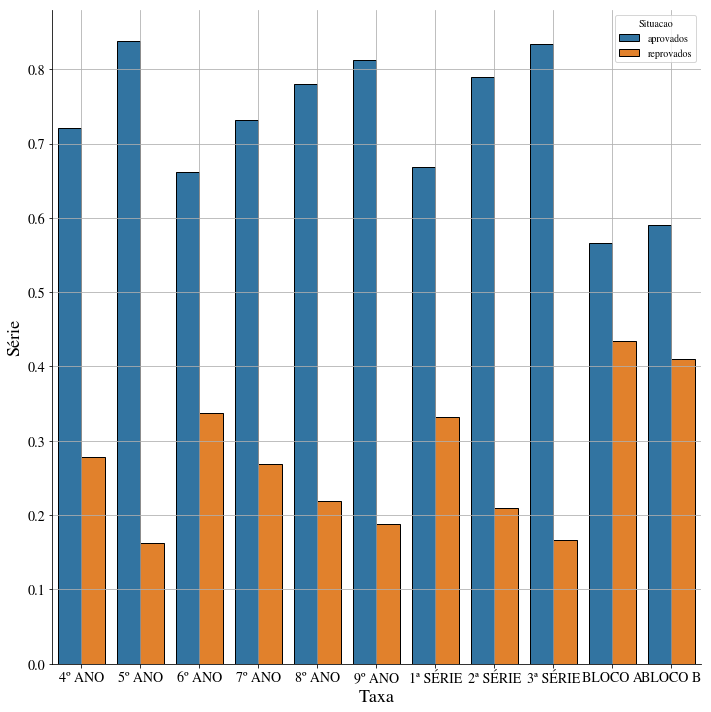

In [58]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'

fig, ax1 = plt.subplots(figsize=(10,10))
tidy = alunos_situacao_count.set_index('serie').stack().reset_index().rename(columns={'level_1': 'Situacao', 0: 'Taxa'})
sns.barplot(x='serie', y='Taxa', hue='Situacao', data=tidy, ax=ax1, edgecolor='black', linewidth=1, order=['4º ANO', '5º ANO', '6º ANO', '7º ANO', '8º ANO', '9º ANO','1ª SÉRIE', '2ª SÉRIE', '3ª SÉRIE', 'BLOCO A', 'BLOCO B'])
sns.despine(fig)


ax1.xaxis.set_tick_params(labelsize=14)
ax1.yaxis.set_tick_params(labelsize=14)
ax1.set_ylabel('Série',fontsize=18)
ax1.set_xlabel('Taxa',fontsize=18)
ax1.grid()
plt.tight_layout()
plt.savefig('plots/aprovacao_serie.pdf',dpi=200)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.preprocessing import LabelEncoder

### CLASSIFICADOR DE APROVACAO - N UTILIZAR A MEDIA
### ADICIONAR O BAIRRO
### CLASSIFICADOR DUMBY

alunos_sem_nulls = alunos.dropna()

X = alunos_sem_nulls[['escola', 'serie', 'turno', 'frequencia']]
X['escola'] = LabelEncoder().fit_transform(X['escola'])
X['serie'] = LabelEncoder().fit_transform(X['serie'])
X['turno'] = LabelEncoder().fit_transform(X['turno'])

Y = alunos_sem_nulls[['situacao']]
Y['situacao'] = LabelEncoder().fit_transform(Y['situacao'])

pgrid = {
    'n_estimators': [100, 200],
    'max_depth':[3, 5],
    'max_features':[0.8, 1]
}

clf = GridSearchCV(RandomForestClassifier(), param_grid=pgrid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
clf.fit(X,Y)
print('Erro médio:', -clf.best_score_)
clf.best_estimator_
#print(clf.feature_importances_)


In [ ]:
bairros = gpd.read_file(folder+'bairros_natal_populacao2016.geojson')
ab = gpd.sjoin(alunos, bairros, op='within')

fig, ax = plt.subplots(figsize=(4,6))
bairros.plot(ax=ax, color='white', edgecolor='black')
ab.plot(ax=ax)

In [ ]:
# plt.contour(,z=ab['media_final'])
# X, Y = np.meshgrid(ab['longitude'],ab['latitude'])

fig, ax = plt.subplots(figsize=(10,6),ncols=2)
bairros.set_index('BAIRRO').join(ab.groupby('BAIRRO').mean()['media_final']).drop(['Parque das Dunas']).plot(column='media_final', cmap='Spectral', edgecolor='black',ax=ax[0])
ax[0].axis('off')
sns.barplot(y='BAIRRO',x='media_final',data=ab.groupby('BAIRRO').mean()['media_final'].reset_index().sort_values('media_final'), palette='Spectral', edgecolor='black', linewidth=1)
ax[1].set_xlim([4.25,6.5])
plt.tight_layout()
plt.savefig(folder+'../plots/mediafinal_bairro.pdf',dpi=200)

In [ ]:
fig, ax = plt.subplots(figsize=(10,6),ncols=2)
bairros.set_index('BAIRRO').join(ab.groupby('BAIRRO').mean()['frequencia']).drop(['Parque das Dunas']).plot(column='media_final', cmap='Spectral', edgecolor='black',ax=ax[0])
ax[0].axis('off')
sns.barplot(y='BAIRRO',x='frequencia',data=ab.groupby('BAIRRO').mean()['frequencia'].reset_index().sort_values('media_final'), palette='Spectral', edgecolor='black', linewidth=1)
ax[1].set_xlim([4.25,6.5])
plt.tight_layout()
plt.savefig('frequencia_bairro.pdf',dpi=200)

In [ ]:
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
fig, ax = plt.subplots(figsize=(6,6))
sns.countplot(y='serie', data=alunos, ax=ax, order=[ 
                                             '1º ANO', '2º ANO', '3º ANO', '4º ANO', '5º ANO', 
                                             '6º ANO', '7º ANO', '8º ANO', '9º ANO',
                                             '1ª SÉRIE', '2ª SÉRIE', '3ª SÉRIE', 'BLOCO A', 'BLOCO B'], palette='Spectral_r')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel('Série',fontsize=18)
ax.set_xlabel('Número de alunos (2018)',fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig(folder+'../plots/count_serie.pdf',dpi=200)

In [ ]:
from sklearn.preprocessing import LabelEncoder

ab = ab.dropna()
X = ab[['serie','turno','disciplina','frequencia','BAIRRO','REG_ADM','densidade2016']]
y = ab['media_final']

for feature in ['serie', 'turno', 'disciplina','BAIRRO','REG_ADM']:
    X[feature] = LabelEncoder().fit_transform(X[feature])
X.head()

In [ ]:
pgrid = {
    'n_estimators': [100, 300],
    'max_depth':[3, 5],
    'max_features':[0.8, 1]
}

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
gs = GridSearchCV(RandomForestRegressor(), param_grid=pgrid, cv=5, n_jobs=-1, scoring='neg_mean_squared_error')
gs.fit(X,y)
print('Erro médio:', np.sqrt(-gs.best_score_))
gs.best_estimator_

In [ ]:
fimp = pd.DataFrame()
fimp['feature'] = X.columns
fimp['importance'] = gs.best_estimator_.feature_importances_

fig, ax = plt.subplots(figsize=(6,6))
sns.barplot(x='importance', y='feature', ax=ax, data=fimp.sort_values('importance',ascending=False),palette='Spectral')
ax.xaxis.set_tick_params(labelsize=14)
ax.yaxis.set_tick_params(labelsize=14)
ax.set_ylabel('Feature',fontsize=18)
ax.set_xlabel('Importance',fontsize=18)
ax.grid()
plt.tight_layout()
plt.savefig(folder+'../plots/rf_feature_importance.pdf',dpi=200)